In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline 

In [2]:
df = pd.read_csv('Mall_Customers.csv')
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [3]:
X = df.iloc[:, [3, 4]].values

Text(0, 0.5, 'WCSS')

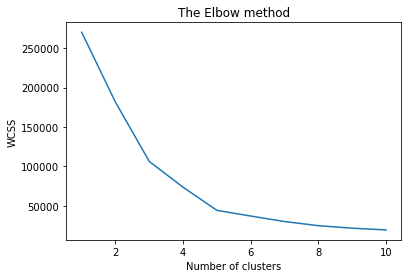

In [4]:
# find number of clusters by elbow method
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init= 'k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('The Elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')  # at 5 we get the elbow 

In [5]:
# now add those no. of clusters to the main algo
kmeans = KMeans(n_clusters=5, init='k-means++' , max_iter=300, n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

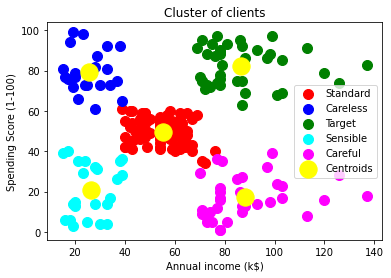

In [6]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1],
            s=100, c='red', label='Standard')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1],
            s=100, c='blue', label='Careless')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1],
            s=100, c='green', label='Target')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1],
            s=100, c='cyan', label='Sensible')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1],
            s=100, c='magenta', label='Careful')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[
            :, 1], s=300, c='yellow', label='Centroids')
plt.title('Cluster of clients')
plt.xlabel('Annual income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()